In [1]:
from compare_GT_data_textlines import all_image_data

In [2]:
import matplotlib.pyplot as plt
from collections import Counter

In [3]:
data_subdirs = all_image_data()

In [4]:
subdirs = list(data_subdirs.keys())

In [5]:
total_chars = [data_subdirs[subdir]['subdir_total_chars'] for subdir in subdirs]

In [30]:
SMALL_SIZE = 10
MEDIUM_SIZE = 14
BIGGER_SIZE = 18

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

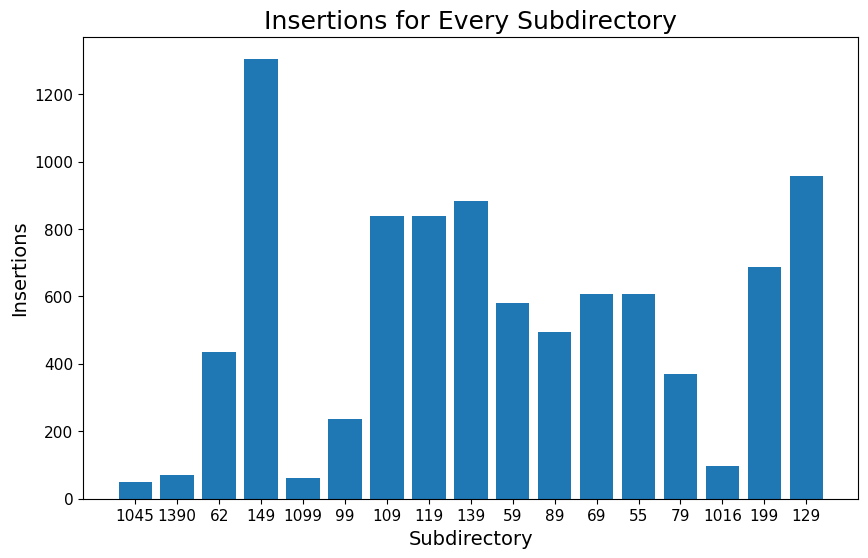

In [15]:
# Create bar plot for insertions for every subdir
insertions = [data_subdirs[subdir]['subdir_insertions'] for subdir in subdirs]

plt.figure(figsize=(10, 6))
plt.bar(subdirs, insertions)
plt.xlabel('Subdirectory')
plt.ylabel('Insertions')
plt.title('Insertions for Every Subdirectory')
plt.show()

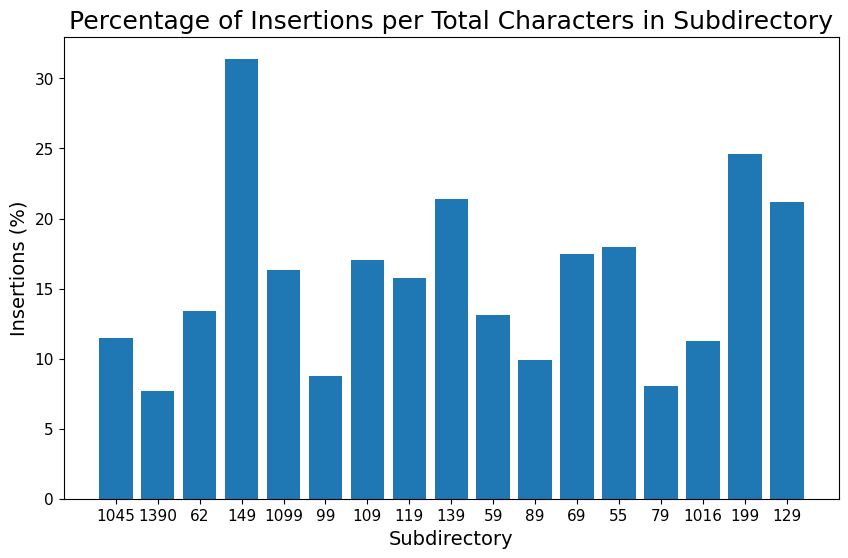

In [16]:
# Calculate the percentage of insertions per total characters for each file
percentages = [(ins / total) * 100 for ins, total in zip(insertions, total_chars)]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(subdirs, percentages)
plt.xlabel('Subdirectory')
plt.ylabel('Insertions (%)')
plt.title('Percentage of Insertions per Total Characters in Subdirectory')
plt.show()

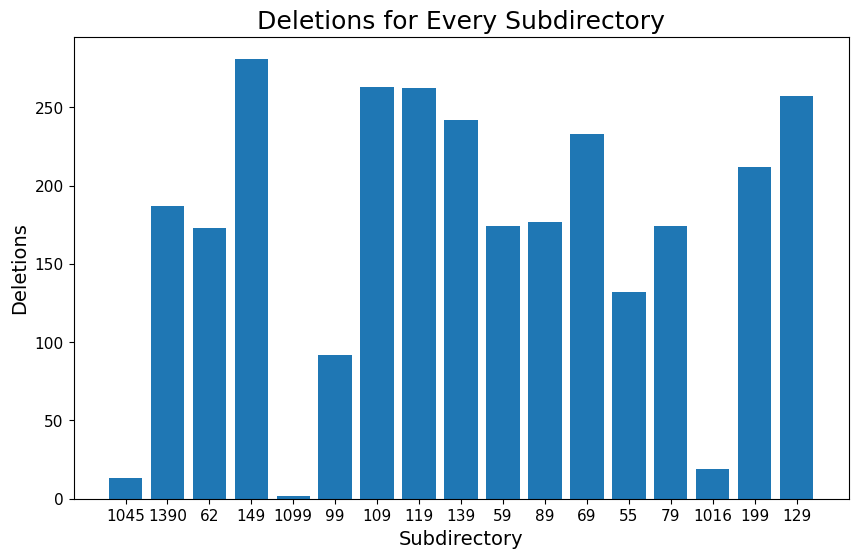

In [17]:
# Create bar plot for deletions for every subdir
plt.figure(figsize=(10, 6))
deletions = [data_subdirs[subdir]['subdir_deletions'] for subdir in subdirs]
plt.bar(subdirs, deletions)
plt.xlabel('Subdirectory')
plt.ylabel('Deletions')
plt.title('Deletions for Every Subdirectory')
plt.show()

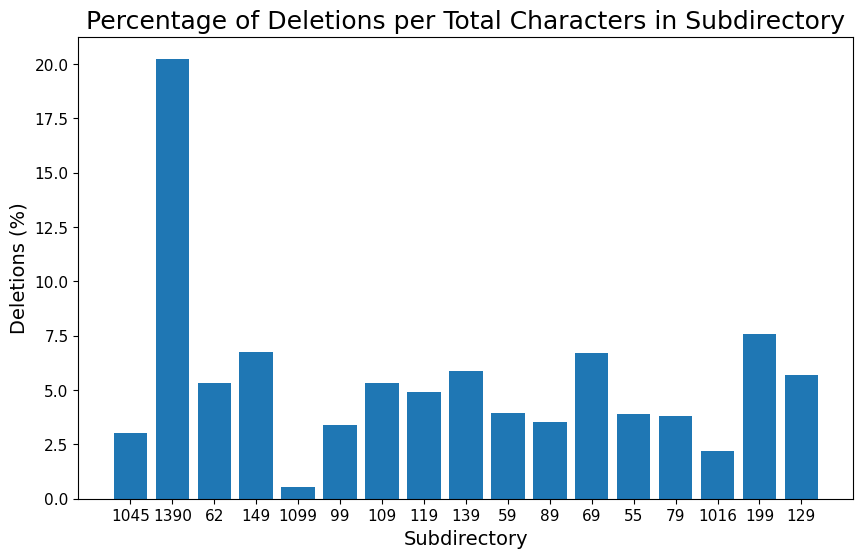

In [18]:
# Calculate the percentage of insertions per total characters for each file
percentages = [(ins / total) * 100 for ins, total in zip(deletions, total_chars)]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(subdirs, percentages)
plt.xlabel('Subdirectory')
plt.ylabel('Deletions (%)')
plt.title('Percentage of Deletions per Total Characters in Subdirectory')
plt.show()

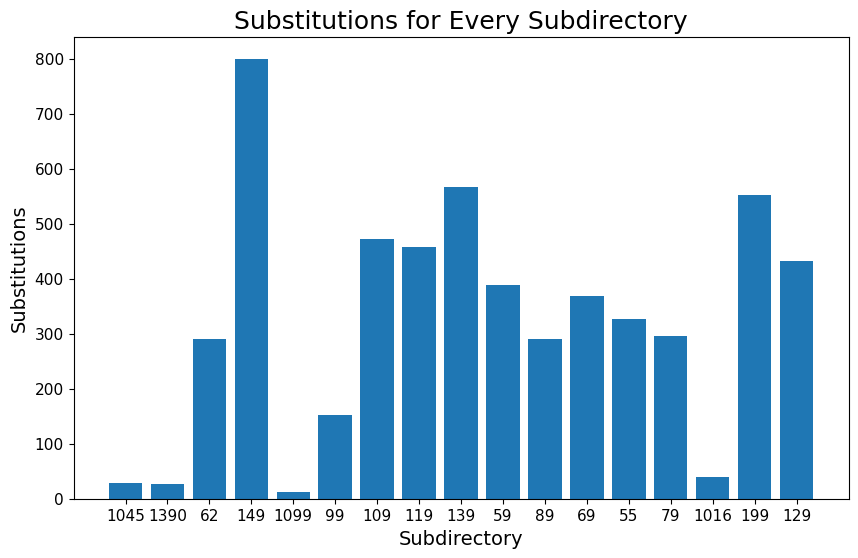

In [19]:
# Create bar plot for substitutions for every subdir
plt.figure(figsize=(10, 6))
substitutions = [data_subdirs[subdir]['subdir_substitutions'] for subdir in subdirs]
plt.bar(subdirs, substitutions)
plt.xlabel('Subdirectory')
plt.ylabel('Substitutions')
plt.title('Substitutions for Every Subdirectory')
plt.show()

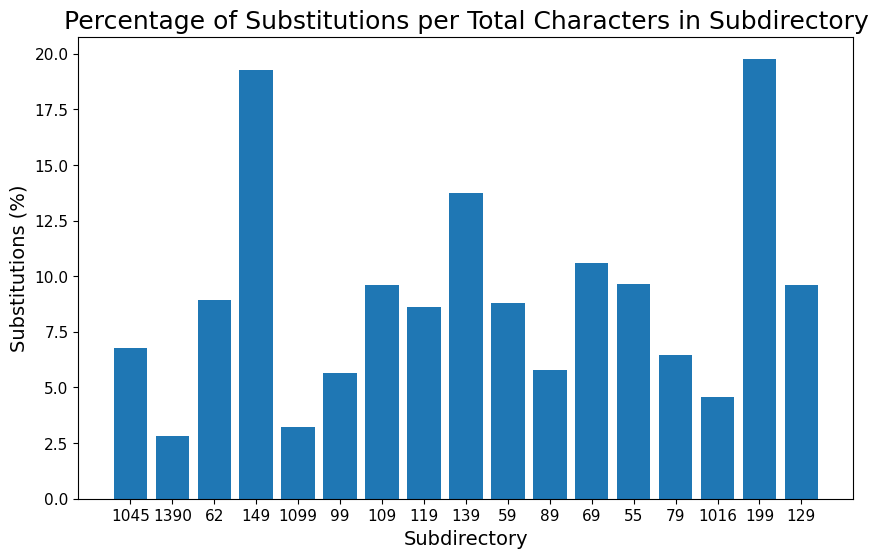

In [20]:
# Calculate the percentage of insertions per total characters for each file
percentages = [(ins / total) * 100 for ins, total in zip(substitutions, total_chars)]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(subdirs, percentages)
plt.xlabel('Subdirectory')
plt.ylabel('Substitutions (%)')
plt.title('Percentage of Substitutions per Total Characters in Subdirectory')
plt.show()

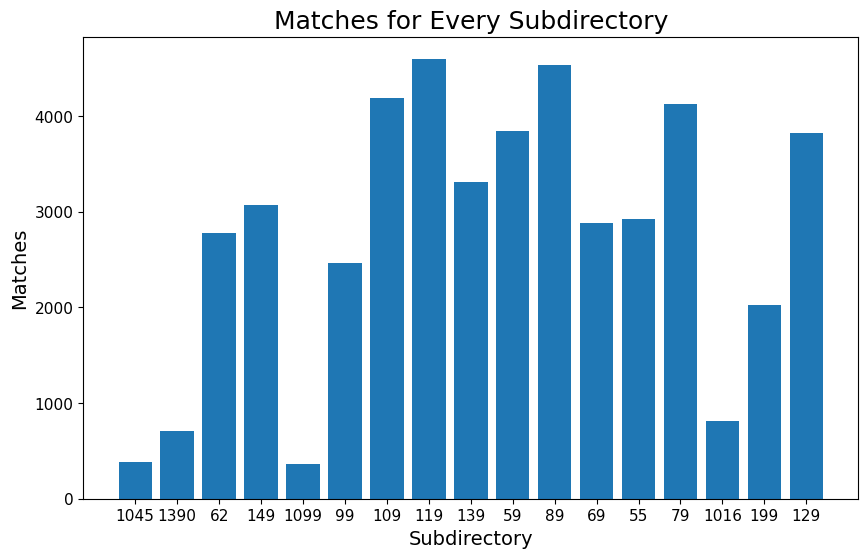

In [21]:
# Create bar plot for matches for every subdir
plt.figure(figsize=(10, 6))
matches = [data_subdirs[subdir]['subdir_matches'] for subdir in subdirs]
plt.bar(subdirs, matches)
plt.xlabel('Subdirectory')
plt.ylabel('Matches')
plt.title('Matches for Every Subdirectory')
plt.show()

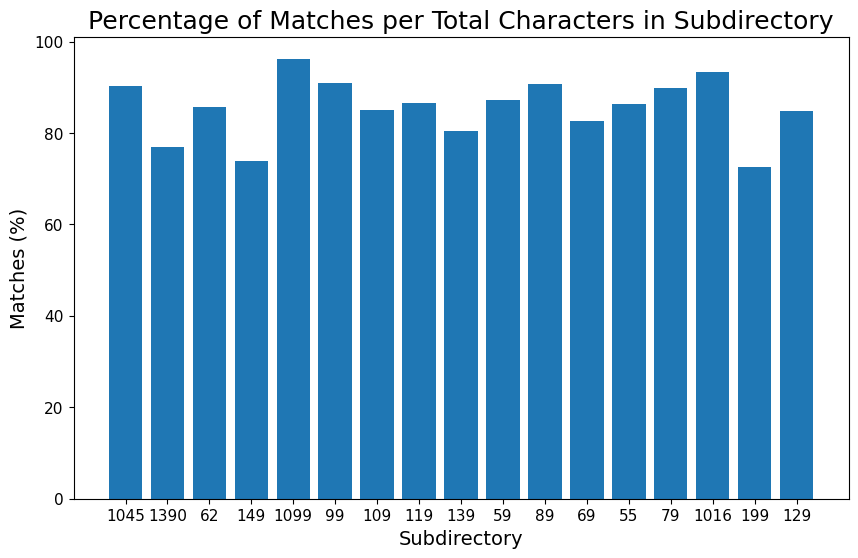

In [22]:
# Calculate the percentage of insertions per total characters for each file
percentages = [(ins / total) * 100 for ins, total in zip(matches, total_chars)]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(subdirs, percentages)
plt.xlabel('Subdirectory')
plt.ylabel('Matches (%)')
plt.title('Percentage of Matches per Total Characters in Subdirectory')
plt.show()

In [23]:
# Total insertions, deletions, substitutions, and matches of all subdirs combined
total_insertions = sum(insertions)
total_deletions = sum(deletions)
total_substitutions = sum(substitutions)
total_matches = sum(matches)

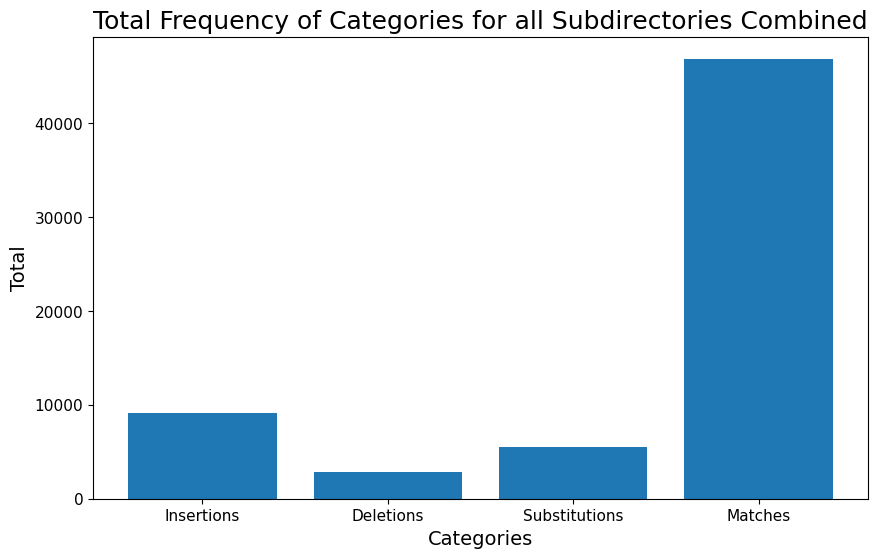

In [24]:
# Create bar plot for total insertions, deletions, substitutions, and matches
categories = ['Insertions', 'Deletions', 'Substitutions', 'Matches']
totals = [total_insertions, total_deletions, total_substitutions, total_matches]

plt.figure(figsize=(10, 6))
plt.bar(categories, totals)
plt.xlabel('Categories')
plt.ylabel('Total')
plt.title('Total Frequency of Categories for all Subdirectories Combined')
plt.show()

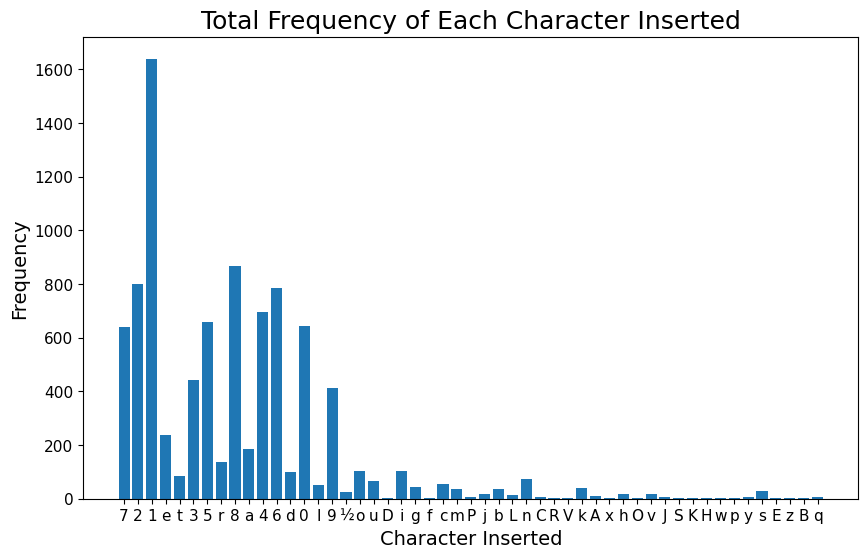

In [25]:
# Total frequency of each char inserted
all_chars_inserted = [char for subdir in data_subdirs.values() for char in subdir['subdir_chars_inserted']]
char_inserted_counts = Counter(all_chars_inserted)

plt.figure(figsize=(10, 6))
plt.bar(char_inserted_counts.keys(), char_inserted_counts.values())
plt.xlabel('Character Inserted')
plt.ylabel('Frequency')
plt.title('Total Frequency of Each Character Inserted')
plt.show()

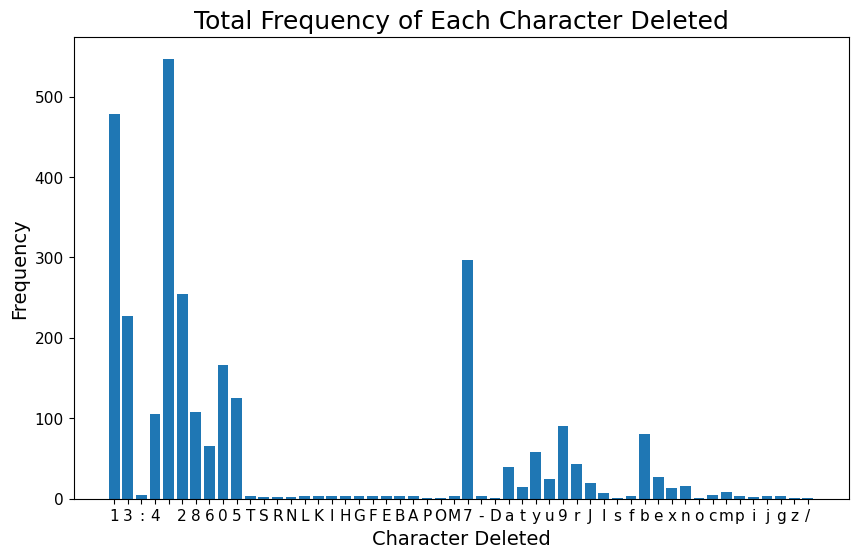

In [26]:
# Total frequency of each char deleted
all_chars_deleted = [char for subdir in data_subdirs.values() for char in subdir['subdir_chars_deleted']]
char_deleted_counts = Counter(all_chars_deleted)

plt.figure(figsize=(10, 6))
plt.bar(char_deleted_counts.keys(), char_deleted_counts.values())
plt.xlabel('Character Deleted')
plt.ylabel('Frequency')
plt.title('Total Frequency of Each Character Deleted')
plt.show()

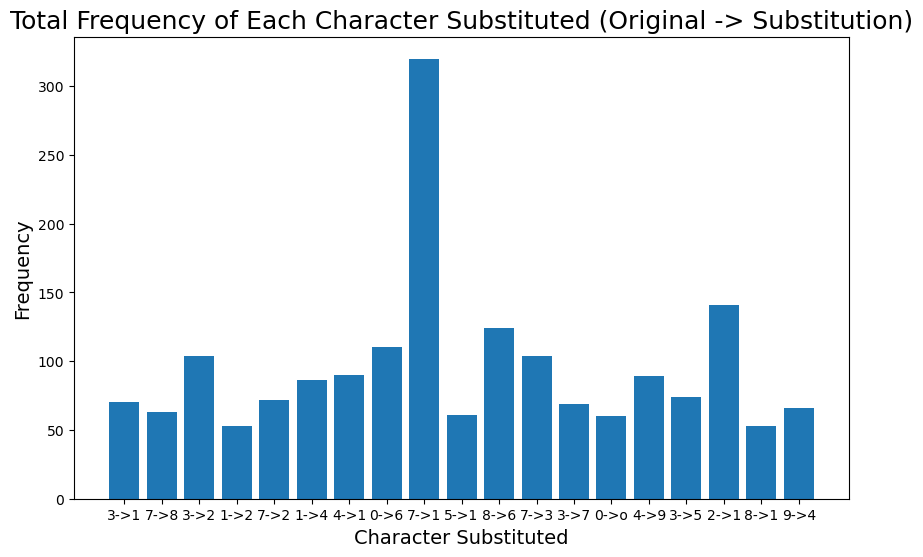

In [31]:
# Total frequency of each char substituted
all_chars_substituted = [(original, substitution) for subdir in data_subdirs.values() for original, substitution in subdir['subdir_chars_substituted']]
char_substituted_counts = Counter(all_chars_substituted)
labels = [f'{k[0]}->{k[1]}' for k in char_substituted_counts.keys()]
values = char_substituted_counts.values()
# Only show bars where frequency > 50 to avoid cluttering
filtered_labels = [label for label, value in zip(labels, values) if value > 50]
filtered_values = [value for value in values if value > 50]

plt.figure(figsize=(10, 6))
plt.bar(filtered_labels, filtered_values)
plt.xlabel('Character Substituted')
plt.ylabel('Frequency')
plt.title('Total Frequency of Each Character Substituted (Original -> Substitution)')
plt.show()

In [19]:
TP = total_matches
FP = total_insertions + total_substitutions
FN = total_deletions

print(TP, FP, FN)

46857 14618 2893


In [20]:
Recall = TP / (TP + FN)
Precision = TP / (TP + FP)
print(Recall, Precision)

0.9418492462311557 0.7622122814152095


In [21]:
# Create a dictionary with labels as keys and values as values
label_value_dict = dict(zip(labels, values))

# Filter labels that end with a letter
filtered_labels = {k: v for k, v in label_value_dict.items() if k[-1].isalpha()}

# Create a dictionary to store the most frequented first character for each unique last character
result = {}

for label, value in filtered_labels.items():
    first_char, last_char = label.split('->')

    # If the last character is not in the result dictionary or the current value is greater than the stored value
    if last_char not in result or value > result[last_char][1]:
        result[last_char] = (first_char, value)

# Print the result
for last_char, (first_char, value) in result.items():
    print(f'{first_char}->{last_char} with frequency {value}')

7->n with frequency 28
8->s with frequency 29
1->r with frequency 19
 ->i with frequency 43
1->t with frequency 32
0->o with frequency 60
9->g with frequency 31
1->e with frequency 41
m->M with frequency 8
1->d with frequency 16
1->p with frequency 7
3->S with frequency 2
1->k with frequency 5
1->a with frequency 24
7->R with frequency 2
1->u with frequency 12
1->f with frequency 3
2->v with frequency 5
y->j with frequency 31
1->C with frequency 4
2->h with frequency 8
6->b with frequency 18
a->x with frequency 1
j->J with frequency 22
1->l with frequency 16
9->m with frequency 5
0->w with frequency 3
9->y with frequency 4
1->c with frequency 7
3->V with frequency 1
2->N with frequency 7
3->Z with frequency 1
a->A with frequency 7
6->E with frequency 3
3->z with frequency 3
1->W with frequency 1
6->F with frequency 1
1->I with frequency 5
9->q with frequency 6
a->P with frequency 1
0->L with frequency 1
2->ƒ with frequency 2
1->K with frequency 1
1->U with frequency 1
3->B with frequen